In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
arch=resnext50

# Checking solution where training set = test set(Just checking!!!)

In [7]:
PATH = "final_data1/user12/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [8]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="train", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      1.098293   578.300047 0.453125  



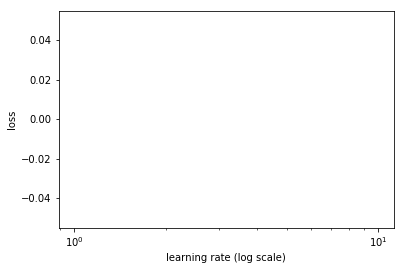

In [9]:
lrf=learn.lr_find()
learn.sched.plot()

In [10]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.699465   0.467016   0.75      
    1      0.588178   0.228949   0.90625         
    2      0.473297   0.20819    0.90625         
    3      0.481562   0.096624   0.953125        
    4      0.401679   0.086638   0.984375        



[array([0.08664]), 0.9843749962747097]

In [11]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.340108   0.067364   0.984375  
    1      0.302453   0.044157   0.984375        
    2      0.24789    0.033135   1.0             
    3      0.263346   0.026853   1.0             
    4      0.234733   0.021501   1.0             



[array([0.0215]), 1.0]

In [12]:
log_preds,y = learn.TTA(n_aug=1)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

1.0

[[34  0]
 [ 0 30]]


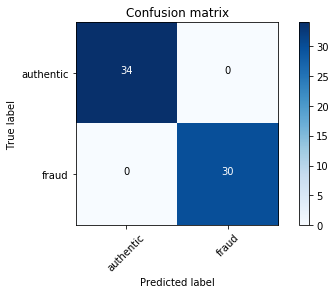

In [13]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

# Real Deal!

In [28]:
PATH = "final_data1/user12/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [29]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="test", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.834542   81.528547  0.365854  



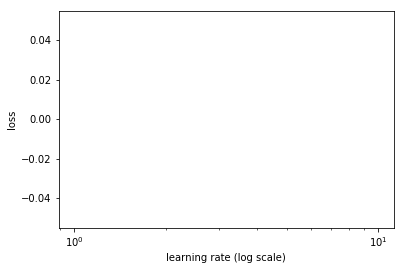

In [30]:
lrf=learn.lr_find()
learn.sched.plot()

In [31]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.681466   0.77498    0.560976  
    1      0.51833    0.763537   0.658537        
    2      0.443569   0.534478   0.682927        
    3      0.388428   0.465598   0.829268        
    4      0.325577   0.496123   0.780488        



[array([0.49612]), 0.7804878019705052]

In [32]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.220988   0.50197    0.804878  
    1      0.190948   0.325118   0.878049        
    2      0.166509   0.265189   0.902439        
    3      0.15465    0.258886   0.902439        
    4      0.149663   0.256116   0.926829        



[array([0.25612]), 0.9268292508474211]

In [19]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.031853   0.335945   0.829268  
    1      0.040261   0.387277   0.829268         
    2      0.066733   0.281076   0.902439         
    3      0.067602   0.268812   0.902439         
    4      0.068358   0.275224   0.926829         
    5      0.089035   0.322195   0.853659         
    6      0.08243    0.844866   0.780488         
    7      0.094147   0.600579   0.829268         
    8      0.084942   0.360965   0.853659         
    9      0.09555    0.372369   0.878049         
    10     0.083714   0.338253   0.853659         
    11     0.08583    0.371093   0.829268         
    12     0.113684   0.382437   0.853659         



[array([0.38244]), 0.8536585496693123]

In [20]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.30456    0.513844   0.829268  
    1      0.213069   0.423362   0.853659        
    2      0.14394    0.390851   0.829268        
    3      0.109434   0.387459   0.853659        
    4      0.088738   0.376548   0.853659         
    5      0.087368   0.420644   0.853659         
    6      0.098888   0.410178   0.853659         
    7      0.08366    0.437725   0.853659         
    8      0.107843   0.483471   0.853659         
    9      0.10246    0.47416    0.878049        
    10     0.088942   0.449374   0.853659         
    11     0.095372   0.442289   0.853659         
    12     0.083025   0.424451   0.853659         



[array([0.42445]), 0.8536585496693123]

In [21]:
learn.fit(0.0001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.013807   0.412127   0.853659  
    1      0.039301   0.402421   0.853659         
    2      0.047418   0.393358   0.853659         
    3      0.054873   0.392483   0.878049         
    4      0.046454   0.396788   0.853659         
    5      0.041131   0.493209   0.829268         
    6      0.142941   0.424814   0.853659         
    7      0.152262   0.474013   0.853659        
    8      0.136864   0.484865   0.853659        
    9      0.124333   0.423823   0.853659        
    10     0.11303    0.428976   0.878049        
    11     0.113333   0.42021    0.878049        
    12     0.157092   0.419449   0.853659        



[array([0.41945]), 0.8536585322240504]

In [22]:
# learn.unfreeze()
# lr = 0.001
# lrs=np.array([lr/100,lr/10,lr])
# learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

In [33]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.926829268292683

[[21  1]
 [ 2 17]]


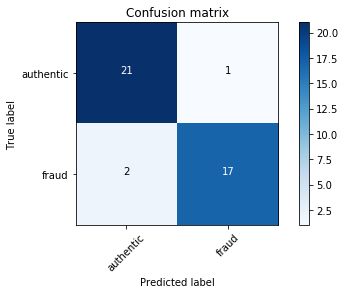

In [34]:
preds = np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [35]:
def accuracy_new(preds, targs, thres=0.5):
    preds = [int(x[1] > thres) for x in preds]
    return (preds==targs).mean()

In [36]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
for cut in [0.4, 0.6, 0.65, 0.7]:
    print(accuracy_new(probs, y, cut))

0.926829268292683                    
0.9024390243902439
0.9024390243902439
0.9024390243902439


[[21  1]
 [ 3 16]]


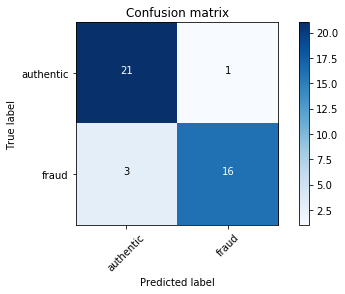

In [37]:
preds = [int(x[1] > 0.6) for x in probs]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)